<a href="https://colab.research.google.com/github/JamaludinGT/Jamaludin14012200015/blob/main/Jamaludin14012200015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install google-play-scraper
from google_play_scraper import reviews, Sort
import csv

result, _ = reviews(
    'com.icon.pln123',
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=600,
    filter_score_with=None
)

filename = 'ulasan_google_play.csv'


with open(filename, 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=['userName', 'score', 'at', 'content'])
    writer.writeheader()
    for review in result:

        writer.writerow({
            'userName': review['userName'],
            'score': review['score'],
            'at': review['at'],
            'content': review['content']
        })

print(f"Berhasil menyimpan {len(result)} ulasan ke '{filename}'")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
Berhasil menyimpan 600 ulasan ke 'ulasan_google_play.csv'


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


           userName  score                   at  \
0       A. Astuniar      5  2025-12-10 13:37:37   
1            Sutris      5  2025-12-10 13:35:58   
2  Bumdes Binausaha      5  2025-12-10 13:35:04   
3    Agus Budiyanto      5  2025-12-10 13:35:03   
4       Ulfa Hoddin      5  2025-12-10 13:33:51   

                                             content  
0      menu simulasi memudahkan untukemgetahui biaya  
1  terimakasih atas bantuannya ya pak,dengan adan...  
2       aplikasi sangat membantu pelaporan pln rusak  
3                                           good job  
4                          sangat menbantu dan cepat  
           userName  score                   at  \
0       A. Astuniar      5  2025-12-10 13:37:37   
1            Sutris      5  2025-12-10 13:35:58   
2  Bumdes Binausaha      5  2025-12-10 13:35:04   
3    Agus Budiyanto      5  2025-12-10 13:35:03   
4       Ulfa Hoddin      5  2025-12-10 13:33:51   

                                             content  \


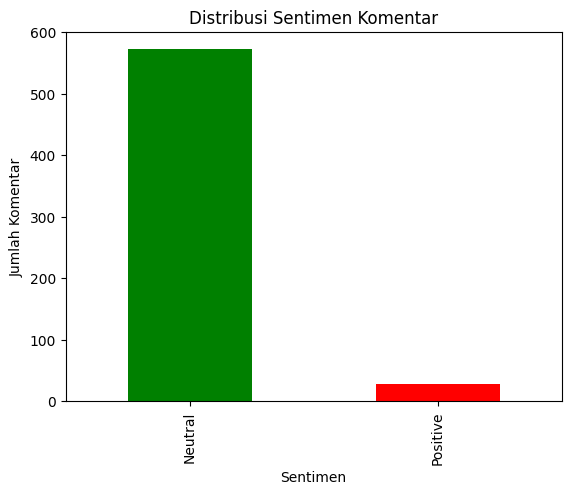

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

df = pd.read_csv("ulasan_google_play.csv")
print(df.head())

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-z\s]", '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['clean_comment'] = df['content'].apply(clean_text)


def sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_comment'].apply(sentiment)

print(df.head())
print(df['sentiment'].value_counts())

df['sentiment'].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.title("Distribusi Sentimen Komentar")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Komentar")
plt.show()